# Insurance rates

Triangulate from insurance rates by state and insurance rates by age to insurance rates by state and age. This also adds driver information to the vehicle file.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textlog
text = textlog.textSetup(prefix='Insurance: ')

In [2]:
age = pd.read_csv('../data/insurance_age.csv').set_index('Age')
state = pd.read_csv('../data/insurance_state.csv')
statepop = pd.read_excel('../data/nst-est2017-01.xlsx', skiprows=2, header=1) #https://www.census.gov/data/tables/2017/demo/popest/state-total.html

In [3]:
statepop = statepop.set_index(statepop.columns[0])

In [4]:
state['population'] = state.State.apply(lambda s: statepop.loc['.' + s.replace('DC', 'District of Columbia'), 2017])

In [5]:
state['rate'] = state['Average rate'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float64')
age['State minimum'] = age['State minimum'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float64')
age['50/100/50'] = age['50/100/50'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float64')
age['100/300/100'] = age['100/300/100'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float64')

In [6]:
# Weighted to match overall numbers, which presumably are population-weighted (?)
avgrate = 1355 # not sure how they calculated this average, but it was provided with the data#np.average(state.rate, weights=state.population)
state['rateadj'] = state.rate / avgrate

In [7]:
for a in age.index:
    state[f'age_{a}_statemin'] = age.loc[a, 'State minimum'] * state.rateadj
    state[f'age_{a}_50_100_50'] = age.loc[a, '50/100/50'] * state.rateadj
    state[f'age_{a}_100_300_100'] = age.loc[a, '100/300/100'] * state.rateadj


In [8]:
state['stateAbbrev'] = state.State.replace({
    'Michigan': 'MI',
    'Louisiana': 'LA',
    'Florida': 'FL',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Kentucky': 'KY',
    'Nevada': 'NV',
    'DC': 'DC',
    'Rhode Island': 'RI',
    'Delaware': 'DE',
    'Oklahoma': 'OK',
    'Pennsylvania': 'PA',
    'California': 'CA',
    'Wyoming': 'WY',
    'Hawaii': 'HI',
    'Colorado': 'CO',
    'Maryland': 'MD',
    'West Virginia': 'WV',
    'Arkansas': 'AR',
    'Arizona': 'AZ',
    'Wisconsin': 'WI',
    'New Jersey': 'NJ',
    'Georgia': 'GA',
    'Mississippi': 'MS',
    'North Dakota': 'ND',
    'Texas': 'TX',
    'Alabama': 'AL',
    'Oregon': 'OR',
    'South Carolina': 'SC',
    'New Mexico': 'NM',
    'Kansas': 'KS',
    'Montana': 'MT',
    'Tennessee': 'TN',
    'Utah': 'UT',
    'Washington': 'WA',
    'Massachusetts': 'MA',
    'Minnesota': 'MN',
    'Missouri': 'MO',
    'Nebraska': 'NE',
    'Alaska': 'AK',
    'New Hampshire': 'NH',
    'South Dakota': 'SD',
    'Iowa': 'IA',
    'Illinois': 'IL',
    'Virginia': 'VA',
    'Indiana': 'IN',
    'Vermont': 'VT',
    'North Carolina': 'NC',
    'Ohio': 'OH',
    'Idaho': 'ID',
    'Maine': 'ME'
})

In [9]:
state = state.set_index('stateAbbrev')
state

,State,Average rate,Unnamed: 2,Unnamed: 3,population,rate,rateadj,age_20_statemin,age_20_50_100_50,age_20_100_300_100,...,age_55_100_300_100,age_65_statemin,age_65_50_100_50,age_65_100_300_100,age_75_statemin,age_75_50_100_50,age_75_100_300_100,age_85_statemin,age_85_50_100_50,age_85_100_300_100
stateAbbrev,,,,,,,,,,,,,,,,,,,,,
MI,Michigan,"$2,484",NaN,NaN,9962311.0,2484.0,1.833210,2020.197786,2311.678229,5891.938007,...,2498.665683,944.103321,1072.428044,2570.160886,1154.922509,1316.245018,3026.630258,1426.237638,1626.057565,3642.588930
LA,Louisiana,"$2,190",NaN,NaN,4684333.0,2190.0,1.616236,1781.092251,2038.073801,5194.583026,...,2202.929889,832.361624,945.498155,2265.963100,1018.228782,1160.457565,2668.405904,1257.431734,1433.601476,3211.461255
FL,Florida,"$1,823",NaN,NaN,20984400.0,1823.0,1.345387,1482.616974,1696.533579,4324.075277,...,1833.763100,692.874539,787.051661,1886.233210,847.594096,965.988192,2221.234686,1046.711439,1193.358672,2673.284871
CT,Connecticut,"$1,771",NaN,NaN,3588184.0,1771.0,1.307011,1440.326199,1648.140959,4200.733579,...,1781.456089,673.110701,764.601476,1832.429520,823.416974,938.433948,2157.875277,1016.854613,1159.318819,2597.030996
NY,New York,"$1,759",NaN,NaN,19849399.0,1759.0,1.298155,1430.566790,1636.973432,4172.270111,...,1769.385240,668.549815,759.420664,1820.013284,817.837638,932.075277,2143.253875,1009.964576,1151.463469,2579.433948
KY,Kentucky,"$1,752",NaN,NaN,4454189.0,1752.0,1.292989,1424.873801,1630.459041,4155.666421,...,1762.343911,665.889299,756.398524,1812.770480,814.583026,928.366052,2134.724723,1005.945387,1146.881181,2569.169004
NV,Nevada,"$1,746",NaN,NaN,2998039.0,1746.0,1.288561,1419.994096,1624.875277,4141.434686,...,1756.308487,663.608856,753.808118,1806.562362,811.793358,925.186716,2127.414022,1002.500369,1142.953506,2560.370480
DC,DC,"$1,723",NaN,NaN,693972.0,1723.0,1.271587,1401.288561,1603.470849,4086.879705,...,1733.172694,654.867159,743.878229,1782.764576,801.099631,912.999262,2099.389668,989.294465,1127.897417,2526.642804
RI,Rhode Island,"$1,688",NaN,NaN,1059639.0,1688.0,1.245756,1372.823616,1570.898893,4003.861255,...,1697.966052,641.564576,728.767528,1746.550554,784.826568,894.453137,2056.743911,969.198524,1104.985978,2475.318081


## Match to NHTS data

We need the person file as well as the vehicle file, to get primary driver age.

In [10]:
vehicles = pd.read_csv('../data/vehicles_fuel_costs.csv', low_memory=False)
person = pd.read_csv('../data/nhts/perpub.csv').set_index(['HOUSEID', 'PERSONID'], drop=False)

In [11]:
# will align indices
person['primaryDriverOfVehicleCount'] = vehicles.groupby(['HOUSEID', 'WHOMAIN']).apply(len)
person['primaryDriverOfVehicleCount'] = person.primaryDriverOfVehicleCount.fillna(0)

In [12]:
# for vehicles without a primary driver, assign to random driver in household, preferring those who do not already
# have a vehicle assigned to them
def guessWhoMain (vehicle):
    if vehicle.WHOMAIN > 0 and vehicle.WHOMAIN <= 10 and (vehicle.HOUSEID, vehicle.PERSONID) in person.index and not person.loc[(vehicle.HOUSEID, vehicle.WHOMAIN), 'R_AGE_IMP'] < 14:
        return vehicle.WHOMAIN
    else:
        hhmembers = person.loc[vehicle.HOUSEID]
        drivers = hhmembers[(hhmembers.DRIVER == 1) & (hhmembers.R_AGE_IMP >= 14)]
        if len(drivers) > 0:
            if np.any(drivers.primaryDriverOfVehicleCount == 0):
                # if any drivers don't have a vehicle, give it to them
                return np.random.choice(drivers[drivers.primaryDriverOfVehicleCount == 0].PERSONID)
            else:
                # otherwise give it to a random driver
                return np.random.choice(drivers.PERSONID)
        else:
            return np.nan # vehicle in a household with no drivers - ?

vehicles['whoMainGuess'] = vehicles.apply(guessWhoMain, 1)

In [13]:
vehiclesWithPrimaryDriver = vehicles.merge(
    person[['R_AGE_IMP']], # TODO do we want to know anything else about these people
    left_on = ('HOUSEID', 'whoMainGuess'),
    right_index = True,
    validate = 'm:1', #multiple vehicles can have the same primary driver, but only one primary driver per vehicle
    how = 'left'
)

In [14]:
# Round ages to the ages in the insurance data
# https://stackoverflow.com/questions/2566412
vehiclesWithPrimaryDriver['insuranceAge'] =\
    np.vectorize(lambda x: age.index.values[np.abs(x - age.index.values).argmin()])(vehiclesWithPrimaryDriver.R_AGE_IMP)

In [15]:
def insuranceTypeForVehicle (vehicle):
    if vehicle.value >= 10000:
        # full comprehensive coverage with high liability. Unfortunately we don't have a low liability
        # comprehensive option
        return '100_300_100'
    else:
        if vehicle.HHFAMINC > 0:
            if vehicle.HHFAMINC <= 4: # < $35k
                return 'statemin' # low income folks likely don't have assets to protect with insurance
            else:
                return '50_100_50'
        else:
            if vehicle.HOMEOWN == 1:
                return '50_100_50' # homeowners likely to be wealthier
            else:
                return 'statemin' # this also includes 7 vehicles with missing data on income and homeownership worth less than 10000
                
    
vehiclesWithPrimaryDriver['insuranceType'] =\
    vehiclesWithPrimaryDriver.apply(insuranceTypeForVehicle, 1).astype('category')

In [16]:
vehiclesWithPrimaryDriver['insuranceCost'] = vehiclesWithPrimaryDriver.apply(
    lambda vehicle: state.loc[vehicle.HHSTATE, f'age_{vehicle.insuranceAge}_{vehicle.insuranceType}'],
    1
)
text('done computing costs')

<Response [201]>

In [17]:
vehiclesWithPrimaryDriver['insuranceCostDiscounted'] = vehiclesWithPrimaryDriver.insuranceCost
vehiclesWithPrimaryDriver.loc[vehiclesWithPrimaryDriver.HHVEHCNT > 1, 'insuranceCostDiscounted'] *= 0.75

In [18]:
vehiclesWithPrimaryDriver.to_csv('../data/vehicles_insurance.csv')

Text(0.5,0.98,'red: state minimum, blue: 500/100/50, purple: 100/300/100 plus comprehensive')

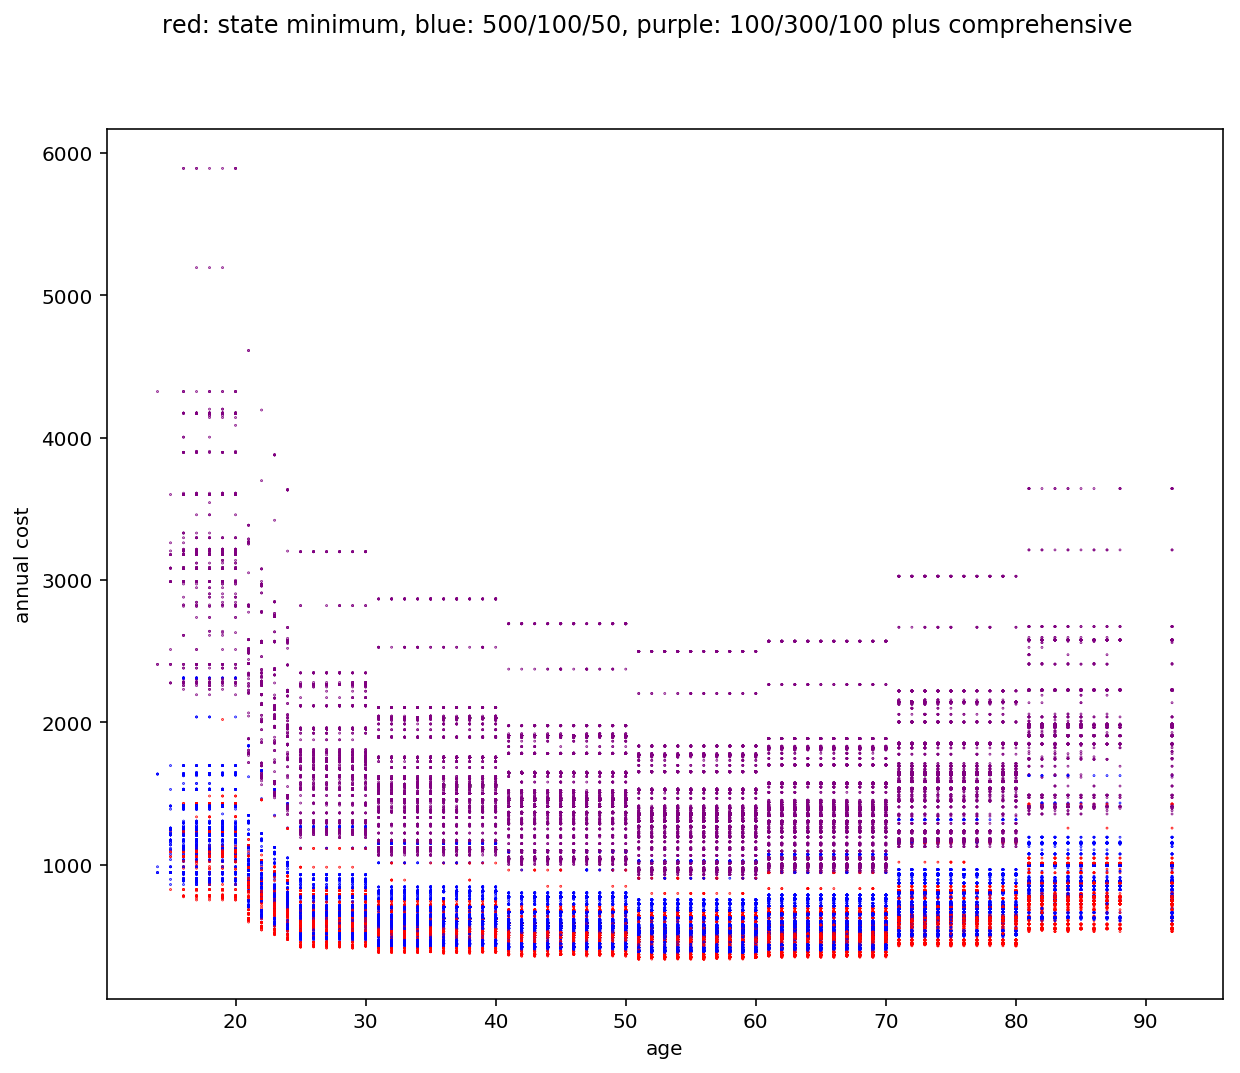

In [19]:
plt.figure(figsize=(10, 8))
col = vehiclesWithPrimaryDriver.insuranceType.replace({
    'statemin': 'red',
    '50_100_50': 'blue',
    '100_300_100': 'purple'
})
plt.scatter(vehiclesWithPrimaryDriver.R_AGE_IMP, vehiclesWithPrimaryDriver.insuranceCost, marker='.', s=0.5, color=col)
plt.xlabel('age')
plt.ylabel('annual cost')
plt.suptitle('red: state minimum, blue: 500/100/50, purple: 100/300/100 plus comprehensive')

In [20]:
pd.crosstab(vehiclesWithPrimaryDriver.value > 10000, pd.cut(vehiclesWithPrimaryDriver.insuranceCost, 4))

insuranceCost,"(331.678, 1725.909]","(1725.909, 3114.585]","(3114.585, 4503.262]","(4503.262, 5891.938]"
value,,,,
False,140180,49,0,0
True,74012,29528,952,14


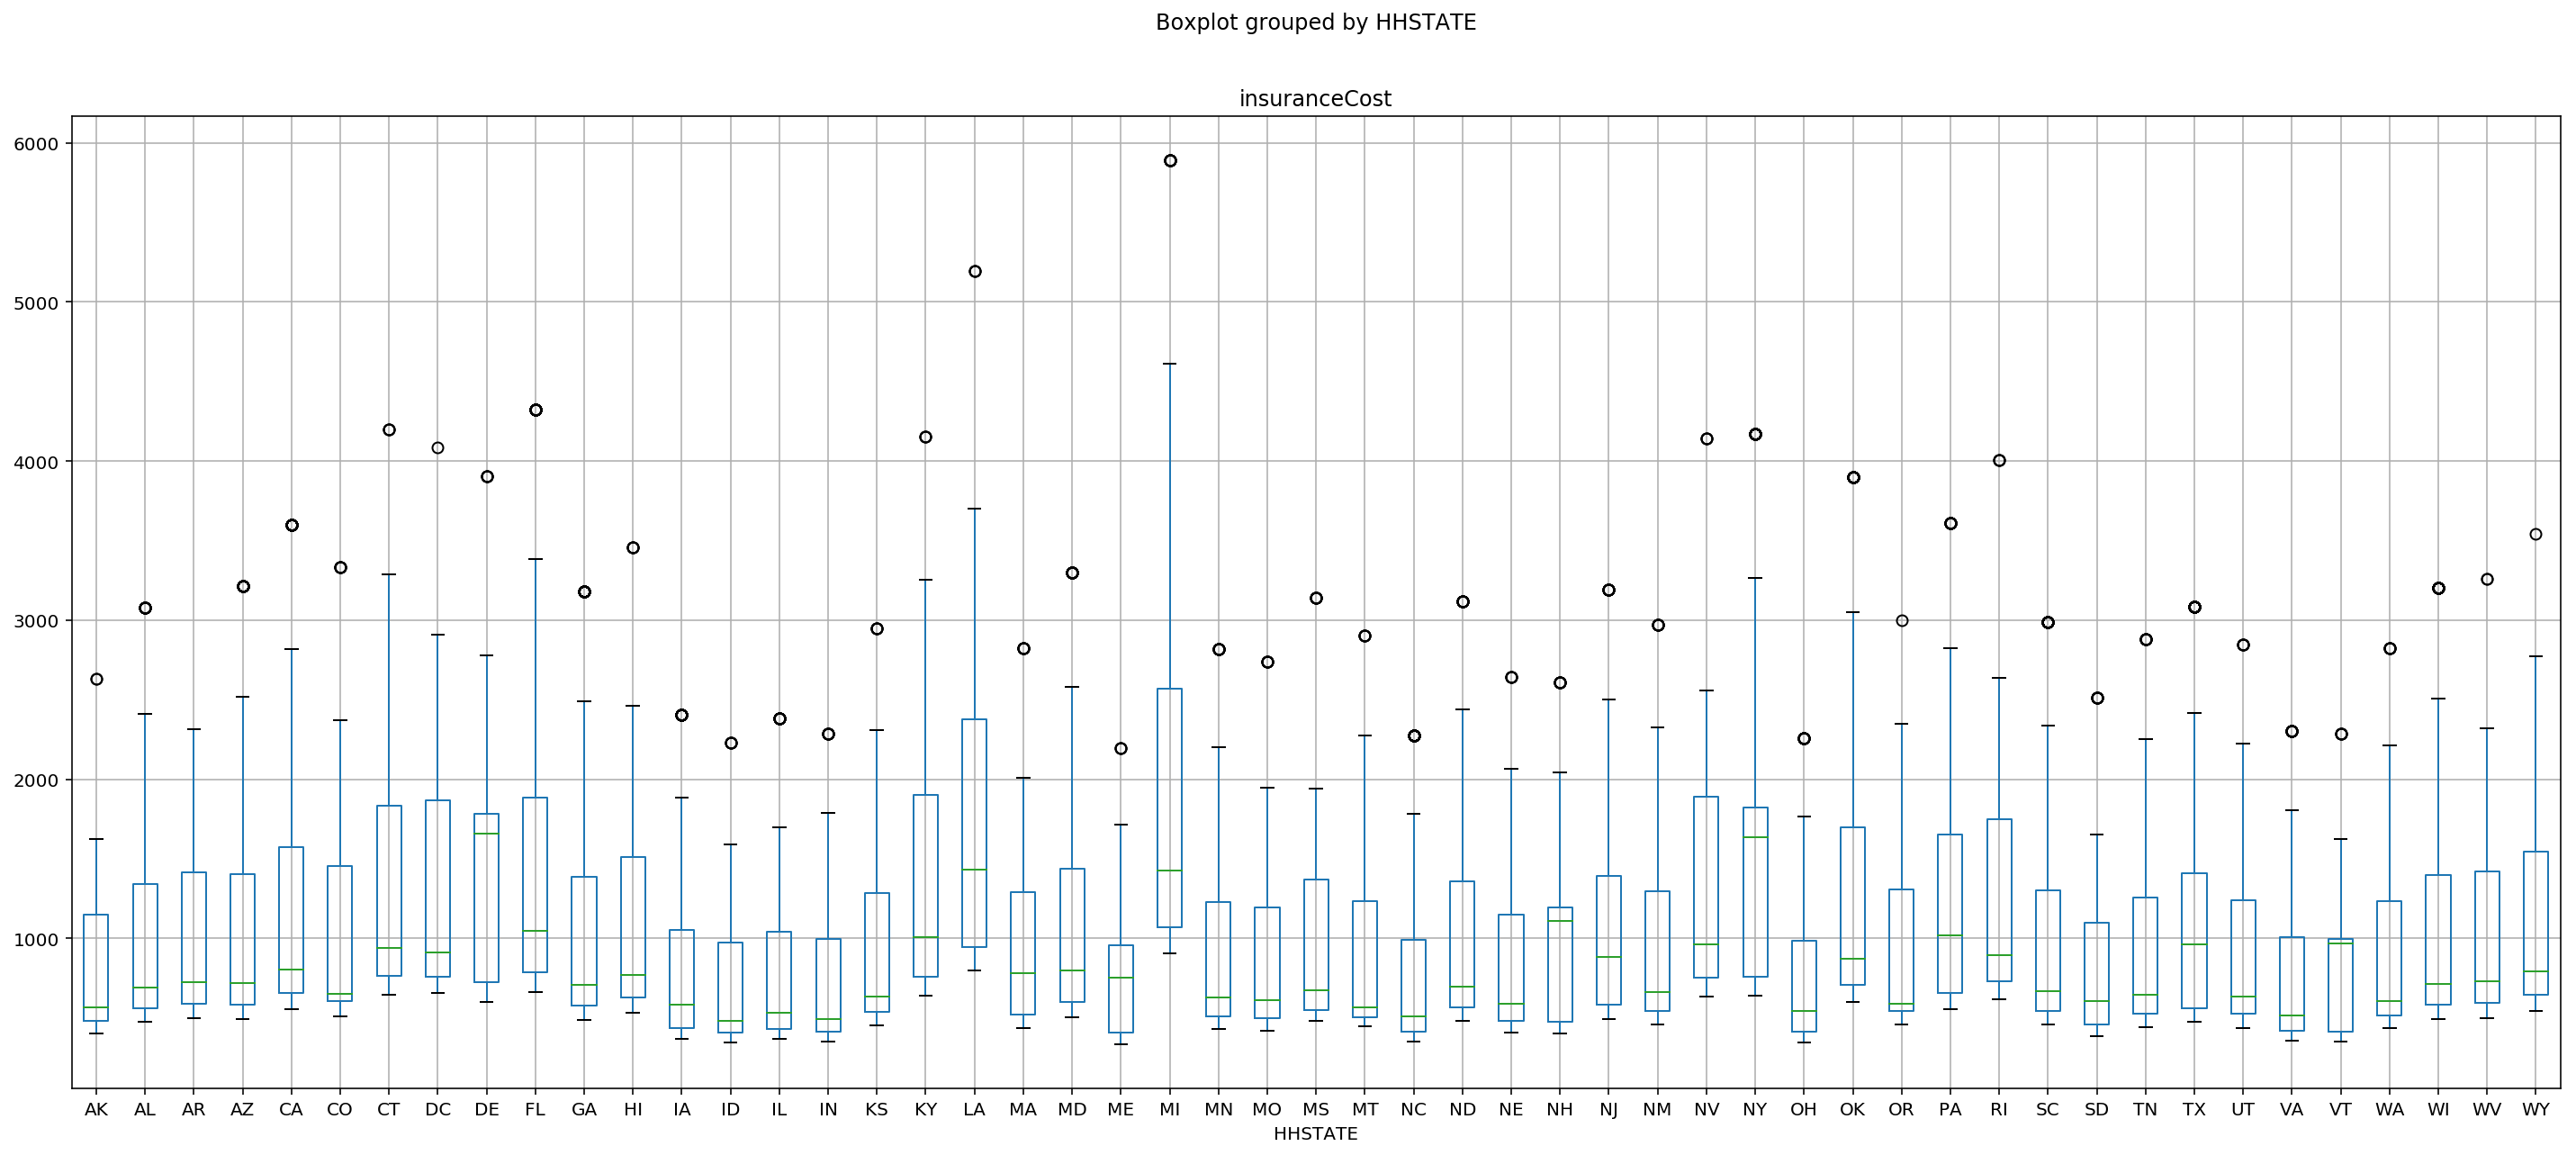

In [21]:
fig, ax = plt.subplots(figsize=(24, 10))
vehiclesWithPrimaryDriver.boxplot(column='insuranceCost', by='HHSTATE', ax=ax)

In [22]:
nhtsVehs = pd.read_csv('../data/nhts/vehpub.csv')

In [23]:
np.sum(pd.isnull(vehicles.WTHHFIN))

0

In [24]:
insCost = vehiclesWithPrimaryDriver.groupby('HOUSEID').apply(lambda x: pd.Series([np.sum(x.insuranceCost), x.WTHHFIN.iloc[0]]))


In [25]:
np.average(insCost.iloc[:,0], weights=insCost.iloc[:,1])

2067.719951605556